# Libraries and routines

In [1]:
import os, sys
sys.path.append(os.path.abspath("/projects/QUIJOTE/Neerav/UNIVERSAL"))
from proj1_libraries import *
from proj1_routines  import *

# Parameters 

In [2]:
do_RSD        = False
axis          = 0 
threads       = 32
x_min, x_max  = 0.0, 1000
y_min, y_max  = 0.0, 1000
z_min, z_max  = 0.0, 1000
boxsize       = 1000
ptypes        = [1]
grid          = 512
dpi           = 300
#poslag        = np.load("/projects/QUIJOTE/Neerav/DATA/project_1_results/poslag.npy") #----EDIT
#rootdir       = "/projects/QUIJOTE/Neerav"
rootdir      = "/scratch/gpfs/QUIJOTE"
pkMAS         = 3*['CIC'] #--------------EDIT
bispectrumMAS = ['CIC']
deltaMAS      = 'CIC'
splits        = 20
theta         = np.linspace(0, np.pi, splits)
k1, k2        = 0.15, 0.25
start, stop   = 130, 139 #------------------------------EDIT

CHOICE = 2 #----power spectra = 1, bispectra = 2
print_stats = 0
print_runtime = 1

# Final positions from displacements

In [ ]:
# path_to_save='/scratch/gpfs/QUIJOTE/FINAL/DATA'
# if not os.path.exists(path_to_save):
#     os.makedirs(path_to_save)

# for real in range(start,stop+1):    
#     posf_quij        = get_final_pos(poslag, rootdir, "datasets", "temp_data/LH_quijdisp_%d.npy"%real)
#     posf_cola        = get_final_pos(poslag, rootdir, "datasets", "temp_data/LH_coladisp_%d.npy"%real)
#     posf_za          = get_final_pos(poslag, rootdir, "datasets", "temp_data/LH_zadisp_%d.npy"%real)
#     posf_cola2quij   = get_final_pos(poslag, rootdir2, "FINAL", "cola2quij"  , "LH_quijdisp_%d_out.npy"%real)
#     posf_za2quij     = get_final_pos(poslag, rootdir2, "FINAL", "za2quij"    , "LH_quijdisp_%d_out.npy"%real)
    
#     np.save(os.path.join(path_to_save, "LH_posf_quij_%d.npy"%real), posf_quij)
#     np.save(os.path.join(path_to_save, "LH_posf_cola_%d.npy"%real), posf_cola)
#     np.save(os.path.join(path_to_save, "LH_posf_za_%d.npy"%real  ), posf_za)
#     np.save(os.path.join(path_to_save, "LH_posf_cola2quij_%d.npy"%real), posf_cola2quij)
#     np.save(os.path.join(path_to_save, "LH_posf_za2quij_%d.npy"%real  ), posf_za2quij)

#     print("Saved data for realization %d."%real)
    
# print("Done!")

# Extraction of cosmological statistics 

In [ ]:
if CHOICE==1:
    K = []
    PK_cola2quij, PK_za2quij, PK_quij, PK_cola, PK_za = [],[],[],[],[]
    R_cola2quij_x_quij, R_za2quij_x_quij, R_cola_x_quij, R_za_x_quij = [],[],[],[]

elif CHOICE==2:
    BK_cola2quij, BK_za2quij, BK_quij, BK_cola, BK_za = [], [], [], [], []
    QK_cola2quij, QK_za2quij, QK_quij, QK_cola, QK_za = [], [], [], [], []

if print_runtime: tA = time.time()

for real in range(start,stop+1):
    if print_runtime: t1 = time.time()
    #print("="*50)
    #print("Processing realization %d"%real)
    #print("="*50)
    
    posf_quij = np.load("/scratch/gpfs/QUIJOTE/FINAL/data/posf_quij_%d.npy"%real)
    posf_cola = np.load("/scratch/gpfs/QUIJOTE/FINAL/data/posf_cola_%d.npy"%real)
    posf_za   = np.load("/scratch/gpfs/QUIJOTE/FINAL/data/posf_za_%d.npy"  %real)
    posf_cola2quij = np.load("/scratch/gpfs/QUIJOTE/FINAL/data/posf_cola2quij_%d.npy"%real)
    posf_za2quij   = np.load("/scratch/gpfs/QUIJOTE/FINAL/data/posf_za2quij_%d.npy"  %real)
    
    #print("Calculating overdensities...")
    delta_quij      = get_overdensity(posf_quij)
    delta_cola      = get_overdensity(posf_cola)
    delta_za        = get_overdensity(posf_za)
    delta_cola2quij = get_overdensity(posf_cola2quij)
    delta_za2quij   = get_overdensity(posf_za2quij)
        
    if CHOICE==1:
        #print('Calculating power spectrum...')
        crossPK = PKL.XPk([delta_quij, delta_cola, delta_za, delta_cola2quij, delta_za2quij],
                           boxsize, axis, pkMAS, threads);

        k = crossPK.k3D
        pk_quij          = crossPK.Pk[:,0,0]
        pk_cola          = crossPK.Pk[:,0,1]
        pk_za            = crossPK.Pk[:,0,2]
        pk_cola2quij     = crossPK.Pk[:,0,3]
        pk_za2quij       = crossPK.Pk[:,0,4]

        xpk_cola_quij        = crossPK.XPk[:,0,0]
        xpk_za_quij          = crossPK.XPk[:,0,1]
        xpk_cola2quij_quij   = crossPK.XPk[:,0,2]
        xpk_za2quij_quij     = crossPK.XPk[:,0,3]

        #print('Calculating cross-correlations...')
        r_cola_x_quij        = xpk_cola_quij        / np.sqrt(pk_cola        * pk_quij)
        r_za_x_quij          = xpk_za_quij          / np.sqrt(pk_za          * pk_quij)
        r_cola2quij_x_quij   = xpk_cola2quij_quij   / np.sqrt(pk_cola2quij   * pk_quij)
        r_za2quij_x_quij     = xpk_za2quij_quij     / np.sqrt(pk_za2quij     * pk_quij)

        #print('Saving data...')
        K.append(k)
        PK_quij.append(pk_quij)
        PK_cola.append(pk_cola)
        PK_za.append(pk_za)
        PK_cola2quij.append(pk_cola2quij)
        PK_za2quij.append(pk_za2quij)

        R_cola_x_quij.append(r_cola_x_quij)
        R_za_x_quij.append(r_za_x_quij)
        R_cola2quij_x_quij.append(r_cola2quij_x_quij)
        R_za2quij_x_quij.append(r_za2quij_x_quij)
        
        
    elif CHOICE==2:
        print('Calculating bispectrum and reduced bispectrum...')
        bk_quij = get_bispectrums(delta_quij, reduced=0)
        bk_cola = get_bispectrums(delta_cola, reduced=0)
        bk_za   = get_bispectrums(delta_za  , reduced=0)
        bk_cola2quij = get_bispectrums(delta_cola2quij, reduced=0)
        bk_za2quij   = get_bispectrums(delta_za2quij  , reduced=0)
        
        print("Saving data...")
        BK_quij.append(bk_quij)
        BK_cola.append(bk_cola)
        BK_za.append(bk_za)
        BK_cola2quij.append(bk_cola2quij)
        BK_za2quij.append(bk_za2quij)

#         QK_quij.append(qk_quij)
#         QK_cola.append(qk_cola)
#         BK_za.append(bk_za)
#         QK_cola2quij.append(qk_cola2quij)
#         QK_za2quij.append(qk_za2quij)
        
    if print_stats:
        print("quij              :", get_stats(posf_quij))
        print("cola              :", get_stats(posf_cola))
        print("za                :", get_stats(posf_za))
        print("preds cola2quij   :", get_stats(posf_cola2quij))
        print("preds za2quij     :", get_stats(posf_za2quij))
        
    if print_runtime:
        print("Realization runtime:", get_runtime(time.time()-t1),'\n')
        
if print_runtime:
    print("#"*200)
    print("Total time to analyze %d realizations: "%(stop-start+1), get_runtime(time.time()-tA))
    print("#"*200)

# Averaging 

In [ ]:
CHOICE = 1
if CHOICE==1:
    avg_k            = get_avg(K)
    avg_pk_quij      = get_avg(PK_quij)
    avg_pk_cola      = get_avg(PK_cola)
    avg_pk_za        = get_avg(PK_za)
    avg_pk_cola2quij = get_avg(PK_cola2quij)
    avg_pk_za2quij   = get_avg(PK_za2quij)

    avg_r_cola_x_quij      = get_avg(R_cola_x_quij)
    avg_r_za_x_quij        = get_avg(R_za_x_quij)
    avg_r_cola2quij_x_quij = get_avg(R_cola2quij_x_quij)
    avg_r_za2quij_x_quij   = get_avg(R_za2quij_x_quij)
    
CHOICE = 2
if CHOICE==2:
    avg_bk_quij        = get_avg(BK_quij)
    avg_bk_cola        = get_avg(BK_cola)
    avg_bk_za          = get_avg(BK_za)
    avg_bk_cola2quij   = get_avg(BK_cola2quij)
    avg_bk_za2quij     = get_avg(BK_za2quij)

# Saving to file

In [ ]:
def save_array(name,listy):
    arr = np.array(listy)
    np.save(name, arr)

save_array("test_pk_quij.npy"     , avg_pk_quij)
save_array("test_pk_cola.npy"     , avg_pk_cola)
save_array("test_pk_za.npy"       , avg_pk_za)
save_array("test_pk_cola2quij.npy", avg_pk_cola2quij)
save_array("test_pk_za2quij.npy"  , avg_pk_za2quij)

save_array("test_r_quij_cola.npy"     , avg_r_cola_x_quij)
save_array("test_r_quij_za.npy"       , avg_r_za_x_quij)
save_array("test_r_quij_cola2quij.npy", avg_r_cola2quij_x_quij)
save_array("test_r_quij_za2quij.npy"  , avg_r_za2quij_x_quij)

save_array("test_bk_quij.npy"     , avg_bk_quij)
save_array("test_bk_cola.npy"     , avg_bk_cola)
save_array("test_bk_za.npy"       , avg_bk_za)
save_array("test_bk_cola2quij.npy", avg_bk_cola2quij)
save_array("test_bk_za2quij.npy"  , avg_bk_za2quij)

# Read results 

In [3]:
path = "/scratch/gpfs/QUIJOTE/arena_cola2nbody/results/processed_data"
avg_k            = np.mean(np.load(path+"/K.npy"),axis=0)
avg_pk_quij      = np.load(path+"/test_Pk_quij.npy")
avg_pk_cola      = np.load(path+"/test_Pk_cola.npy")
avg_pk_za        = np.load(path+"/test_Pk_za.npy")
avg_pk_cola2quij = np.load(path+"/test_Pk_cola2quij.npy")
avg_pk_za2quij   = np.load(path+"/test_Pk_za2quij.npy")

avg_r_cola_x_quij      = np.load(path+"/test_r_quij_cola.npy")
avg_r_za_x_quij        = np.load(path+"/test_r_quij_za.npy")
avg_r_cola2quij_x_quij = np.load(path+"/test_r_quij_cola2quij.npy")
avg_r_za2quij_x_quij   = np.load(path+"/test_r_quij_za2quij.npy")

avg_bk_quij = np.load(path+"/test_bk_quij.npy")
avg_bk_cola = np.load(path+"/test_bk_cola.npy")
avg_bk_za   = np.load(path+"/test_bk_za.npy")
avg_bk_cola2quij = np.load(path+"/test_bk_cola2quij.npy")
avg_bk_za2quij   = np.load(path+"/test_bk_za2quij.npy")

avg_pk_quij.shape, avg_k.shape

((443,), (443,))

# Calculation of Halo Mass Function 

In [ ]:
import mass_function_library as MFL

OmegaM = 0.3175
Masses = np.logspace(8, 20, 100) #array with halo masses
author = 'ST'   #Sheth-Tormen halo mass function
bins   = 10000  #number of bins to use for Pk
z      = 0.0    #redshift; only used for Tinker, Tinker10 and Crocce
delta  = 200.0  #overdensity; only for Tinker and Tinker10

HMF_quij = MFL.MF_theory(avg_k, avg_pk_quij, OmegaM, Masses, author, bins, z, delta)
HMF_cola = MFL.MF_theory(avg_k, avg_pk_cola, OmegaM, Masses, author, bins, z, delta)
HMF_za   = MFL.MF_theory(avg_k, avg_pk_za  , OmegaM, Masses, author, bins, z, delta)
HMF_cola2quij = MFL.MF_theory(avg_k, avg_pk_cola2quij, OmegaM, Masses, author, bins, z, delta)
HMF_za2quij   = MFL.MF_theory(avg_k, avg_pk_za2quij  , OmegaM, Masses, author, bins, z, delta)

# $P(k), T(k), B(k)\text{ ratio of }B(k) \text{ and HMF}$ 

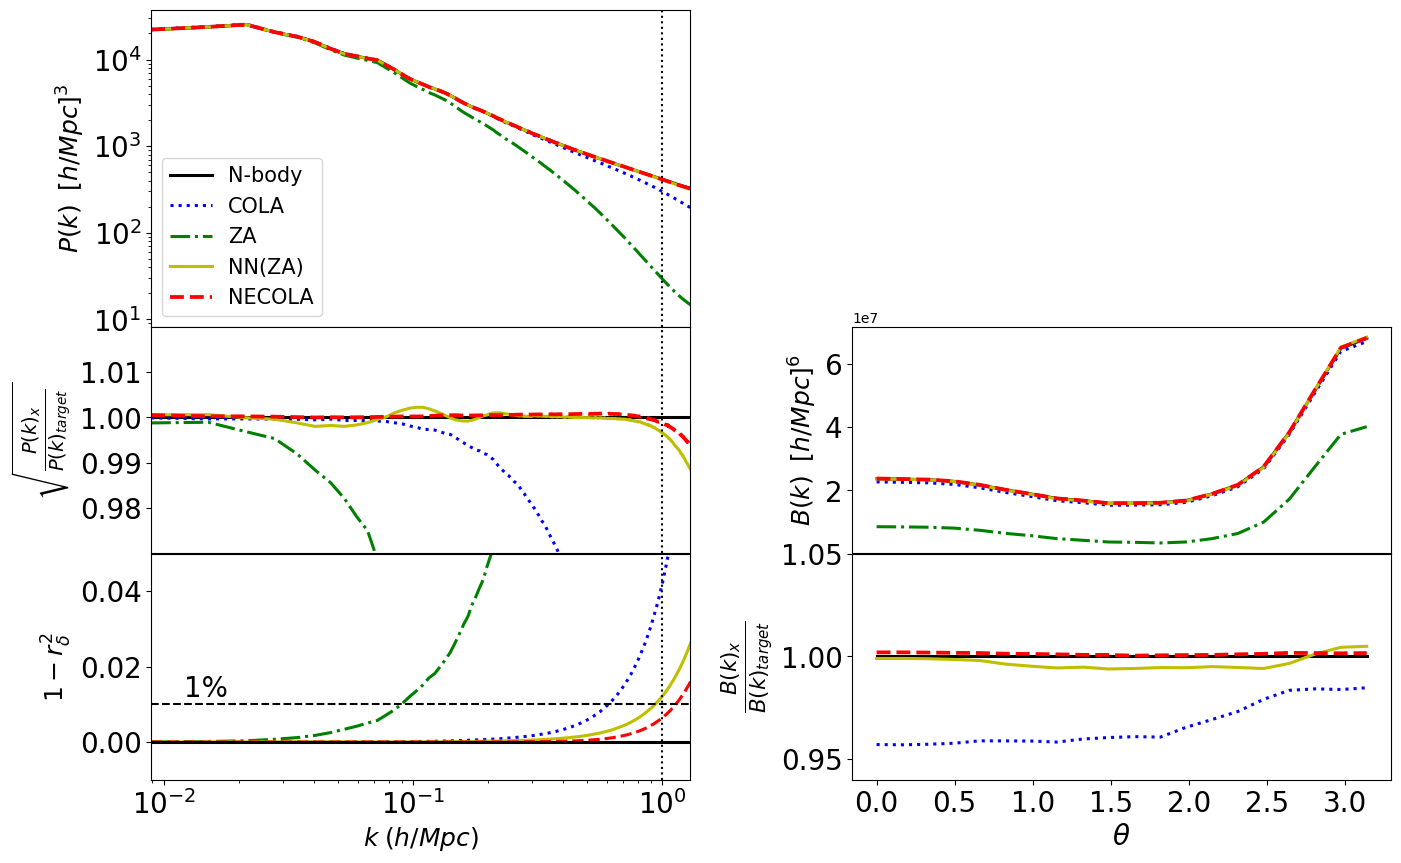

In [6]:
# Create two subplots and unpack the output array immediately

#---path to save graphs
path_to_save="/scratch/gpfs/QUIJOTE/arena_cola2nbody/results/2_test-set_analysis/graphs"
if not os.path.exists(path_to_save):
    os.makedirs(path_to_save)

#---figure parameters
lw = 2.2
xlimdist = 1.3
ticklabelsize = 20
axeslabelsize = 18
legendsize=15
plt.style.use('default')

#---figure initiation
f, ax = plt.subplots(3, 2, figsize=(16,10), gridspec_kw={'height_ratios': [1.4, 1, 1]}, sharex='col')#, sharey='row')
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.001)
#f = plt.figure()
#ax1 = f.add_subplot()
#ax2 = fig.add_subplot(5, 4, 2, sharex = ax1)
ax1,ax2,ax6,ax3,ax5,ax4 = ax[0,0], ax[1,0], ax[0,1], ax[1,1], ax[2,0], ax[2,1]
ax6.axis('off')

ax1.plot(avg_k , avg_pk_quij     , c='k', lw=lw, ls ='-' , label=r'N-body')
ax1.plot(avg_k , avg_pk_cola     , c='b', lw=lw, ls =':' , label=r'COLA')
ax1.plot(avg_k , avg_pk_za       , c='g', lw=lw, ls ='-.' , label='ZA')
ax1.plot(avg_k , avg_pk_za2quij  , c='y', lw=lw, ls ='-', label='NN(ZA)')
ax1.plot(avg_k , avg_pk_cola2quij, c='r', lw=lw+.5, ls ='--', label='NECOLA')
ax1.axvline(1.0, c='k', ls=':')
ax1.set_ylabel(r"$P(k)\;\;[h/Mpc]^3$", fontsize=axeslabelsize)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(avg_k[0], xlimdist)
ax1.tick_params(axis='y', which='major', labelsize=ticklabelsize)
#ax1.set_xticks()
#ax1.set_yticks()
ax1.legend(fontsize=legendsize)


ax2.plot(avg_k , np.sqrt(avg_pk_quij     /avg_pk_quij), c='k', lw=lw, ls ='-' , label=r'Truth')
ax2.plot(avg_k , np.sqrt(avg_pk_cola     /avg_pk_quij)*(1-0.005), c='b', lw=lw, ls =':' , label=r'Benchmark')
ax2.plot(avg_k , np.sqrt(avg_pk_za       /avg_pk_quij), c='g', lw=lw, ls ='-.' , label='ZA')
ax2.plot(avg_k , np.sqrt(avg_pk_za2quij  /avg_pk_quij), c='y', lw=lw, ls ='-', label='NN(ZA)')
ax2.plot(avg_k , np.sqrt(avg_pk_cola2quij/avg_pk_quij), c='r', lw=lw+.5, ls ='--', label='NN(LPT)')
ax2.axvline(1.0, c='k', ls=':')
ax2.set_xlabel(r"$k\;\;[h/Mpc]$", fontsize=axeslabelsize)
ax2.set_ylabel(r"$\sqrt{\frac{P(k)_x}{P(k)_{target}}}$", fontsize=axeslabelsize+2)
ax2.set_xscale('log')
#ax2.set_yscale('log')
ax2.set_xlim(avg_k[0], xlimdist)
#ax2.set_ylim(0.9, 1.05)
ax2.set_ylim(0.97, 1.02)
ax2.tick_params(axis='both', which='major', labelsize=ticklabelsize)
ax2.set_yticks([0.98,0.99,1.0,1.01])
#ax1.set_xticks()
#ax1.set_yticks()
#ax2.legend(fontsize=18)

ax3.plot(theta , avg_bk_quij     , c='k', lw=lw, ls ='-' , label=r'Truth')
ax3.plot(theta , avg_bk_cola     , c='b', lw=lw, ls =':' , label=r'Benchmark')
ax3.plot(theta , avg_bk_za       , c='g', lw=lw, ls ='-.' , label='ZA')
ax3.plot(theta , avg_bk_za2quij  , c='y', lw=lw, ls ='-', label='NN(ZA)')
ax3.plot(theta , avg_bk_cola2quij, c='r', lw=lw+.5, ls ='--', label='NN(LPT)')
#ax3.axvline(1.0, c='k', ls=':')
ax3.set_ylabel(r"$B(k)\;\;[h/Mpc]^6$", fontsize=axeslabelsize)
#ax3.set_xscale('log')
#ax3.set_yscale('log')
#ax3.set_xlim(avg_k[0], xlimdist)
ax3.tick_params(axis='y', which='major', labelsize=ticklabelsize)
#ax3.legend(fontsize=legendsize)

ax5.plot(avg_k , 1-avg_r_cola_x_quij**2      , c='b', lw=lw, ls =':' , label=r'Benchmark')
ax5.plot(avg_k , 1-avg_r_za_x_quij**2        , c='g', lw=lw, ls ='-.' , label='ZA')
ax5.plot(avg_k , 1-avg_r_za2quij_x_quij**2   , c='y', lw=lw, ls ='-', label='NN(ZA)')
ax5.plot(avg_k , 1-avg_r_cola2quij_x_quij**2 , c='r', lw=lw, ls ='--', label='NN(LPT)')
ax5.axvline(1.0, c='k', ls=':')

ax5.axhline(0+0.01, c='k', ls='--', lw=1.5)
ax5.text(0.012, 0+0.012, r'1%', fontsize=20)

ax5.axhline(0.0, c='k', label='target', lw=lw)
ax5.set_xscale('log')
ax5.set_xlim(avg_k[0], xlimdist)
ax5.set_ylim(-0.01,0.05)
ax5.set_xlabel(r"$k\;(h/Mpc)$", fontsize=axeslabelsize)
ax5.set_ylabel(r"$1-r_{\delta}^2$", fontsize=axeslabelsize)
ax5.tick_params(axis='both', which='major', labelsize=ticklabelsize)
ax5.set_yticks([0.0,0.02,0.04])#0.99,1.0,1.01])
#ax5.legend(fontsize=legendsize)

# shax = ax4.get_shared_x_axes()
# shay = ax4.get_shared_y_axes()
# shax.remove(ax4)
# shay.remove(ax4)
# ax4.clear()

ax4.plot(theta , avg_bk_quij     /avg_bk_quij, c='k', lw=lw, ls ='-' , label=r'Truth')
ax4.plot(theta , avg_bk_cola     /avg_bk_quij, c='b', lw=lw, ls =':' , label=r'Benchmark')
ax4.plot(theta , avg_bk_za       /avg_bk_quij, c='g', lw=lw, ls ='-.' , label='ZA')
ax4.plot(theta , avg_bk_za2quij  /avg_bk_quij, c='y', lw=lw, ls ='-', label='NN(ZA)')
ax4.plot(theta , avg_bk_cola2quij/avg_bk_quij, c='r', lw=lw+.5, ls ='--', label='NN(COLA)')
#ax4.axvline(1.0, c='k', ls=':')
ax4.set_xlabel(r"$\theta$", fontsize=axeslabelsize+2)
ax4.set_ylabel(r"$\frac{B(k)_x}{B(k)_{target}}$", fontsize=axeslabelsize+4)
ax4.set_ylim(0.94, 1.05)
#ax4.set_xlim(theta[0], theta[-1])
ax4.tick_params(axis='both', which='major', labelsize=ticklabelsize)



# lw = 3
# xlimdist = 1.3
# ticklabelsize = 20
# axeslabelsize = 18
# legendsize=15
# plt.style.use('default')
# f, ax6 = plt.subplots(1, 1, figsize=(16,10))#, gridspec_kw={'height_ratios': [1.4, 1, 1]}, sharex='col')#, sharey='row')
# #f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.001)
# ax6.loglog(Masses, HMF_quij/HMF_quij, c='k', ls='-', lw=lw, label=r'Truth')
# ax6.loglog(Masses, HMF_cola/HMF_quij, c='b', ls=':', lw=lw, label=r'Benchmark')
# ax6.loglog(Masses, HMF_za/HMF_quij  , c='g',ls='-.', lw=lw, label='ZA')
# ax6.loglog(Masses, HMF_za2quij/HMF_quij  , c='y', ls='-', lw=lw, label='NN(ZA)')
# ax6.loglog(Masses, HMF_cola2quij/HMF_quij, c='r', ls='--', lw=lw, label='NN(COLA)')
# ax6.set_ylabel(r'$\frac{f\;(M,z=0)_{X}}{f\;(M,z=0)_{Nbody}}$', fontsize=axeslabelsize+4)
# ax6.set_xlabel(r'$M\;[M_{\odot}]$', fontsize=axeslabelsize+2)
# ax6.legend(fontsize=legendsize)
# ax6.tick_params(axis='both',which='major', labelsize=ticklabelsize)
# #ax6.savefig('hmf2.png')
# # shax = ax6.get_shared_x_axes()
# # shay = ax6.get_shared_y_axes()
# # shax.remove(ax6)
# # shay.remove(ax6)
# # ax6.clear()

f.savefig(os.path.join(path_to_save,'test_results.png'))

# Old routine to plot (DO NOT USE)

In [ ]:
# Create two subplots and unpack the output array immediately

lw = 2.2
xlimdist = 1.3
ticklabelsize = 20
axeslabelsize = 18
legendsize=15
plt.style.use('default')
f, ax = plt.subplots(3, 2, figsize=(16,10), gridspec_kw={'height_ratios': [1.6, 1, 1]}, sharex='col')
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.001)

ax1,ax2,ax3,ax4,ax5,ax6 = ax[0,0], ax[1,0], ax[0,1], ax[1,1], ax[2,0], ax[2,1]
ax6.axis('off')

ax1.plot(avg_k , avg_pk_quij     , c='k', lw=lw, ls ='-' , label=r'Truth')
ax1.plot(avg_k , avg_pk_cola     , c='b', lw=lw, ls =':' , label=r'Benchmark')
ax1.plot(avg_k , avg_pk_za       , c='g', lw=lw, ls ='-.' , label='ZA')
ax1.plot(avg_k , avg_pk_za2quij  , c='y', lw=lw, ls ='-', label='NN(ZA)')
ax1.plot(avg_k , avg_pk_cola2quij, c='r', lw=lw+.5, ls ='--', label='NN(LPT)')
ax1.axvline(1.0, c='k', ls=':')
ax1.set_ylabel(r"$P(k)\;\;[h/Mpc]^3$", fontsize=axeslabelsize)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(avg_k[0], xlimdist)
ax1.tick_params(axis='y', which='major', labelsize=ticklabelsize)
#ax1.set_xticks()
#ax1.set_yticks()
ax1.legend(fontsize=legendsize)


ax2.plot(avg_k , np.sqrt(avg_pk_quij     /avg_pk_quij), c='k', lw=lw, ls ='-' , label=r'Truth')
ax2.plot(avg_k , np.sqrt(avg_pk_cola     /avg_pk_quij), c='b', lw=lw, ls =':' , label=r'Benchmark')
ax2.plot(avg_k , np.sqrt(avg_pk_za       /avg_pk_quij), c='g', lw=lw, ls ='-.' , label='ZA')
ax2.plot(avg_k , np.sqrt(avg_pk_za2quij  /avg_pk_quij), c='y', lw=lw, ls ='-', label='NN(ZA)')
ax2.plot(avg_k , np.sqrt(avg_pk_cola2quij/avg_pk_quij), c='r', lw=lw+.5, ls ='--', label='NN(LPT)')
ax2.axvline(1.0, c='k', ls=':')
ax2.set_xlabel(r"$k\;\;[h/Mpc]$", fontsize=axeslabelsize)
ax2.set_ylabel(r"$\sqrt{\frac{P(k)_x}{P(k)_{target}}}$", fontsize=axeslabelsize+2)
ax2.set_xscale('log')
#ax2.set_yscale('log')
ax2.set_xlim(avg_k[0], xlimdist)
#ax2.set_ylim(0.9, 1.05)
ax2.set_ylim(0.97, 1.02)
ax2.tick_params(axis='both', which='major', labelsize=ticklabelsize)
ax2.set_yticks([0.98,0.99,1.0,1.01])
#ax1.set_xticks()
#ax1.set_yticks()
#ax2.legend(fontsize=18)

ax3.plot(theta , avg_bk_quij     , c='k', lw=lw, ls ='-' , label=r'Truth')
ax3.plot(theta , avg_bk_cola     , c='b', lw=lw, ls =':' , label=r'Benchmark')
ax3.plot(theta , avg_bk_za       , c='g', lw=lw, ls ='-.' , label='ZA')
ax3.plot(theta , avg_bk_za2quij  , c='y', lw=lw, ls ='-', label='NN(ZA)')
ax3.plot(theta , avg_bk_cola2quij, c='r', lw=lw+.5, ls ='--', label='NN(LPT)')
#ax3.axvline(1.0, c='k', ls=':')
ax3.set_ylabel(r"$B(k)\;\;[h/Mpc]^6$", fontsize=axeslabelsize)
#ax3.set_xscale('log')
#ax3.set_yscale('log')
#ax3.set_xlim(avg_k[0], xlimdist)
ax3.tick_params(axis='y', which='major', labelsize=ticklabelsize)
#ax3.legend(fontsize=legendsize)


ax4.plot(theta , avg_bk_quij     /avg_bk_quij, c='k', lw=lw, ls ='-' , label=r'Truth')
ax4.plot(theta , avg_bk_cola     /avg_bk_quij, c='b', lw=lw, ls =':' , label=r'Benchmark')
ax4.plot(theta , avg_bk_za       /avg_bk_quij, c='g', lw=lw, ls ='-.' , label='ZA')
ax4.plot(theta , avg_bk_za2quij  /avg_bk_quij, c='y', lw=lw, ls ='-', label='NN(ZA)')
ax4.plot(theta , avg_bk_cola2quij/avg_bk_quij, c='r', lw=lw+.5, ls ='--', label='NN(LPT)')
#ax4.axvline(1.0, c='k', ls=':')
ax4.set_xlabel(r"$\theta$", fontsize=axeslabelsize+2)
ax4.set_ylabel(r"$\frac{B(k)_x}{B(k)_{target}}$", fontsize=axeslabelsize+4)
#ax4.set_xscale('log')
#ax2.set_yscale('log')
#ax4.set_xlim(avg_k[0], xlimdist)
ax4.set_ylim(0.94, 1.05)
ax4.set_xlim(theta[0], theta[-1])
ax4.tick_params(axis='both', which='major', labelsize=ticklabelsize)
ax4.set_xticks(theta)
#ax1.set_yticks()
#ax2.legend(fontsize=18)

#f.tight_layout()

# lw = 2.2
# xlimdist = 1.3
# ticklabelsize = 20
# axeslabelsize = 20
# legendsize=17

#f, ax1 = plt.subplots(1, 1, figsize=(12,8))
#f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.1)

ax5.plot(avg_k , 1-avg_r_cola_x_quij**2      , c='b', lw=lw, ls =':' , label=r'Benchmark')
ax5.plot(avg_k , 1-avg_r_za_x_quij**2        , c='g', lw=lw, ls ='-.' , label='ZA')
ax5.plot(avg_k , 1-avg_r_za2quij_x_quij**2   , c='y', lw=lw, ls ='-', label='NN(ZA)')
ax5.plot(avg_k , 1-avg_r_cola2quij_x_quij**2 , c='r', lw=lw, ls ='--', label='NN(LPT)')
ax5.axvline(1.0, c='k', ls=':')
ax5.axhline(0.0, c='k', label='target', lw=lw)
ax5.set_xscale('log')
ax5.set_xlim(avg_k[0], xlimdist)
ax5.set_ylim(-0.01,0.05)
ax5.set_xlabel(r"$k\;(h/Mpc)$", fontsize=axeslabelsize)
ax5.set_ylabel(r"$1-r_{\delta}^2$", fontsize=axeslabelsize)
ax5.tick_params(axis='both', which='major', labelsize=ticklabelsize)
ax5.set_yticks([0.0,0.02,0.04])#0.99,1.0,1.01])
#ax5.legend(fontsize=legendsize)

#f.savefig(os.path.join(path_to_save,'test_r.png'))

#f.savefig(os.path.join(path_to_save,'NEWEST_test_results.png'))

# Halo Mass Function (HMF)

In [ ]:
# import mass_function_library as MFL

OmegaM = 0.3175
Masses = np.logspace(11, 15, 100) #array with halo masses
author = 'ST'   #Sheth-Tormen halo mass function
bins   = 10000  #number of bins to use for Pk
z      = 0.0    #redshift; only used for Tinker, Tinker10 and Crocce
delta  = 200.0  #overdensity; only for Tinker and Tinker10

HMF_quij = MFL.MF_theory(avg_k, avg_pk_quij, OmegaM, Masses, author, bins, z, delta)
HMF_cola = MFL.MF_theory(avg_k, avg_pk_cola, OmegaM, Masses, author, bins, z, delta)
HMF_za   = MFL.MF_theory(avg_k, avg_pk_za  , OmegaM, Masses, author, bins, z, delta)
HMF_cola2quij = MFL.MF_theory(avg_k, avg_pk_cola2quij, OmegaM, Masses, author, bins, z, delta)
HMF_za2quij   = MFL.MF_theory(avg_k, avg_pk_za2quij  , OmegaM, Masses, author, bins, z, delta)

In [ ]:
plt.figure(figsize=(12,8))
plt.loglog(Masses, HMF_quij, c='k', ls ='-', label='N-body')
plt.loglog(Masses, HMF_cola, c='g', ls='--', label='COLA')
#plt.loglog(Masses, HMF_za/HMF_quij  , c='m', label='ZA')
plt.loglog(Masses, HMF_cola2quij, c='r', ls='--',label='NN(COLA)')
plt.loglog(Masses, HMF_za2quij  , c='g', ls='-.', label='NN(ZA)')
plt.ylabel(r'$HMF$', fontsize=24)
plt.xlabel(r'$M\;[M_{\odot}]$', fontsize=22)
plt.xlim(1e11,1e15)
plt.legend(fontsize=14)
plt.tick_params(axis='both',labelsize=18)
plt.savefig('hmf.png')

# $P(k)$ 

In [ ]:
plt.figure(figsize=(12,8))

lw = 3
plt.plot(avg_k , avg_pk_quij     , c='r', lw=lw, ls ='-' , label=r'Truth')
plt.plot(avg_k , avg_pk_cola     , c='b', lw=lw, ls ='-' , label=r'Benchmark')
plt.plot(avg_k , avg_pk_za       , c='g', lw=lw, ls ='-' , label='ZA')
plt.plot(avg_k , avg_pk_za2quij  , c='c', lw=lw, ls ='--', label='NN(ZA)')
plt.plot(avg_k , avg_pk_cola2quij, c='k', lw=lw, ls ='--', label='NN(LPT)')

plt.xscale('log')
plt.yscale('log')

llim = k[0]
ulim = 1.6
plt.xlim(llim, ulim)
#plt.ylim(10,20000)

plt.xlabel(r"$k\;(h/Mpc)$", fontsize=22)
plt.ylabel(r"$P(k)\;(h/Mpc)^3$", fontsize=)
plt.xticks(size=24)
plt.yticks(size=24)
#plt.title("3D Power Spectrum upto k=%.1f"%ulim, fontsize=16)
plt.legend(fontsize=18)

plt.savefig(os.path.join(path_to_save,'test_pk.png')) #, dpi=dpi)
plt.show()

# $T(k) = \sqrt{\frac{P(k)_A}{P(k)_B}}$

In [ ]:
plt.figure(figsize=(12,8))

lw = 2
plt.plot(k2 , np.sqrt(pk2_quij     /pk2_quij), c='r', lw=lw, ls ='-' , label=r'Truth')
plt.plot(k2 , np.sqrt(pk2_cola     /pk2_quij), c='b', lw=lw, ls ='-' , label=r'COLA')
plt.plot(k2 , np.sqrt(pk2_za       /pk2_quij), c='g', lw=lw, ls ='-' , label=r'ZA')
plt.plot(k2 , np.sqrt(pk2_za2quij  /pk2_quij), c='m', lw=lw, ls ='--' , label='ZA_to_NBody')
plt.plot(k2 , np.sqrt(pk2_cola2quij/pk2_quij), c='k', lw=lw, ls ='--', label='COLA_to_NBody')
#plt.plot(k , np.sqrt(pk_zacola2quij/pk_target), c='c', lw=1.5, ls ='-' , label='ZA+COLA_to_NBody')

plt.xscale('log')
#plt.yscale('log')

llim = k[0]
ulim = 2
plt.xlim(llim, ulim)
#plt.ylim(0.,1.25)
plt.ylim(0.9,1.05)

plt.xlabel("k (h/Mpc)", fontsize=18)
plt.ylabel(r"$\sqrt{\frac{P(k)_x}{P(k)_{target}}}$", fontsize=24).set_rotation(90)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Transfer function from k=%.1f to k=%.1f"%(llim,ulim), fontsize=16)
plt.legend(fontsize=16)

plt.savefig(os.path.join(path_to_save,'transfer_function5_from_%.1f_to_%.1f.png'%(llim,ulim)), dpi=dpi)
#plt.show()

# $(1-r^2)$ 

In [ ]:
lw = 2.5
xlimdist = 1.3
ticklabelsize = 20
axeslabelsize = 20
legendsize=17

f, ax1 = plt.subplots(1, 1, figsize=(12,8))
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.1)

ax1.plot(avg_k , 1-avg_r_cola_x_quij**2      , c='b', lw=lw, ls =':' , label=r'Benchmark')
ax1.plot(avg_k , 1-avg_r_za_x_quij**2        , c='g', lw=lw, ls ='-.' , label='ZA')
ax1.plot(avg_k , 1-avg_r_za2quij_x_quij**2   , c='y', lw=lw, ls ='-', label='NN(ZA)')
ax1.plot(avg_k , 1-avg_r_cola2quij_x_quij**2 , c='r', lw=lw, ls ='--', label='NN(LPT)')
ax1.axvline(1.0, c='k', ls=':', lw=lw)
ax1.axhline(0.0, c='k', label='target', lw=lw)
ax1.set_xscale('log')
ax1.set_xlim(avg_k[0], xlimdist)
ax1.set_ylim(-0.01,0.05)
ax1.set_xlabel(r"$k\;(h/Mpc)$", fontsize=axeslabelsize)
ax1.set_ylabel(r"$1-r_{\delta}^2$", fontsize=axeslabelsize)
ax1.tick_params(axis='both', which='major', labelsize=ticklabelsize)
ax1.legend(fontsize=legendsize)

f.savefig(os.path.join(path_to_save,'test_r.png'))

# B(k)

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(theta, bk_quij       , c='r', lw=lw, ls ='-' , label='NBody (target)')
plt.plot(theta, bk_cola       , c='b', lw=lw, ls ='-' , label='COLA')
plt.plot(theta, bk_za         , c='g', lw=lw, ls ='-' , label='ZA')
plt.plot(theta, bk_za2quij    , c='c', lw=lw, ls ='--' , label='ZA_to_NBody')
plt.plot(theta, bk_cola2quij  , c='k', lw=lw, ls ='--', label='COLA_to_NBody')
#plt.plot(theta, bk_zacola2quij, c='c', lw=1.5, ls ='-' , label='ZA+COLA_to_NBody')

#plt.xscale('log')
#plt.yscale('log')

llim = theta[0]#0.01
ulim = theta[-1]#1.0
#plt.xlim(llim, ulim)
#plt.ylim(100,10000)

plt.xlabel(r"${\theta} \;(in \; \pi)$", fontsize=18)
plt.ylabel(r"$B(k)$", fontsize=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Bispectrum: k1=%.2f, k2=%.2f"%(k1,k2), fontsize=16)
plt.legend(fontsize=16)

plt.savefig(os.path.join(path_to_save,'bispectrum.png'), dpi=dpi)
plt.show()

# B(k) ratio 

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(theta, bk_quij     /bk_quij  , c='r', lw=lw, ls ='-' , label='NBody (target)')
plt.plot(theta, bk_cola     /bk_quij  , c='b', lw=lw, ls ='-' , label='COLA')
plt.plot(theta, bk_za       /bk_quij  , c='g', lw=lw, ls ='-' , label='ZA')
plt.plot(theta, bk_za2quij  /bk_quij  , c='c', lw=lw, ls ='--' , label='ZA_to_NBody')
plt.plot(theta, bk_cola2quij/bk_quij  , c='k', lw=lw, ls ='--', label='COLA_to_NBody')
#plt.plot(theta, bk_zacola2quij, c='c', lw=1.5, ls ='-' , label='ZA+COLA_to_NBody')

#plt.xscale('log')
#plt.yscale('log')

llim = theta[0]#0.01
ulim = theta[-1]#1.0
#plt.xlim(llim, ulim)
#plt.ylim(0.94,1.05)

plt.xlabel(r"${\theta} \;(in \; \pi)$", fontsize=18)
plt.ylabel(r"$B(k)$", fontsize=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Bispectrum ratio: k1=%.2f, k2=%.2f"%(k1,k2), fontsize=16)
plt.legend(fontsize=16)

plt.savefig(os.path.join(path_to_save,'bispectrum_ratio_1.png'), dpi=dpi)
plt.show()

# Q(k)

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(theta, qk_quij       , c='r', lw=lw, ls ='-' , label='NBody (target)')
plt.plot(theta, qk_cola       , c='b', lw=lw, ls ='-' , label='COLA')
plt.plot(theta, qk_za         , c='g', lw=lw, ls ='-' , label='ZA')
plt.plot(theta, qk_za2quij    , c='c', lw=lw, ls ='--' , label='ZA_to_NBody')
plt.plot(theta, qk_cola2quij  , c='k', lw=lw, ls ='--', label='COLA_to_NBody')
#plt.plot(theta, bk_zacola2quij, c='c', lw=1.5, ls ='-' , label='ZA+COLA_to_NBody')

#plt.xscale('log')
#plt.yscale('log')

llim = theta[0]#0.01
ulim = theta[-1]#1.0
#plt.xlim(llim, ulim)
#plt.ylim(100,10000)

plt.xlabel(r"${\theta}$", fontsize=18)
plt.ylabel(r"Reduced $B(k)$", fontsize=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Reduced Bispectrum", fontsize=16)
plt.legend(fontsize=16)

plt.savefig(os.path.join(path_to_save,'reduced_bispectrum.png'), dpi=dpi)
plt.show()

# $[1-T(k)]^2$ 

In [ ]:
plt.figure(figsize=(12,8))


plt.plot(k , (1-np.sqrt(pk_tars   /pk_tars))**2, c='r', lw=1.5, ls ='-'  , label='target (quijote)')
plt.plot(k , (1-np.sqrt(pk_preds/pk_tars))**2  , c='k', lw=1.5, ls ='--' , label='predictions')
plt.plot(k , (1-np.sqrt(pk_benches/pk_tars))**2, c='b', lw=1.5, ls ='--' , label='benchmark (cola)')

plt.xscale('log')

llim = k[0]
ulim = 1.6
plt.xlim(llim, ulim)
plt.ylim(-0.01,0.04)

plt.xlabel("k (h/Mpc)", fontsize=18)
plt.ylabel(r"$(1-\sqrt{\frac{P(k)_x}{P(k)_{target}}})^2$", fontsize=24).set_rotation(90)
plt.xticks(size=18)
plt.yticks(size=18)
plt.legend(fontsize=16)

#plt.savefig(os.path.join(path_to_save,'(1-sqrt(t))^2_upto_%.1f.png'%ulim), dpi=dpi)
plt.show()

# Density Fields

In [ ]:
#x_min, x_max  = 0.0, 50 #100 #100 #x-range; change to your case
#y_min, y_max  = 0.0, 50 #100 #100 #y-range; change to your case
#z_min, z_max  = 0.0, 50 #15.0 #20  #z-range; change to your case
#boxsize=50

i=131

posf_target = np.load(os.path.join(rootdir, "data", "test/quijposf_%d.npy"%i))
delta_target = get_overdensity(posf_target, projection='2D')
#mydelta = delta_target
#nameme = 'target'

# posf_bench  = np.load(os.path.join(rootdir, "data", "test/colaposf_%d.npy"%i))
# delta_bench = get_overdensity(posf_bench, projection='2D')
# mydelta = delta_bench
# nameme = 'benchmark'

posf_cola2quij  = get_final_pos(poslag, rootdir, "FINAL", "cola2quij"  , "quijdisp_%d_out.npy"%i)
delta_cola2quij = get_overdensity(posf_cola2quij, projection='2D')
#mydelta = delta_cola2quij
#nameme = 'cola2quij_1'

#posf_za2quij     = get_final_pos(poslag, rootdir, "FINAL", "za2quij"    , "quijdisp_%d_out.npy"%i)
#delta_za2quij     = get_overdensity(posf_za2quij, projection='2D')
#mydelta = delta_za2quij
#nameme = 'za2quij'

#posf_zacola2quij = get_final_pos(poslag, rootdir, "FINAL", "zacola2quij", "quijdisp_%d_out.npy"%i)
#delta_zacola2quij = get_overdensity(posf_zacola2quij, projection='2D')
#mydelta = delta_zacola2quij
#nameme = 'zacola2quij'

In [ ]:
i = 131
boxsize=1000
posf_target = np.load(os.path.join(rootdir, "data", "test/quijposf_%d.npy"%i))
posf_cola2quij  = get_final_pos(poslag, rootdir, "FINAL", "cola2quij"  , "quijdisp_%d_out.npy"%i)
print(get_stats(posf_target))
print(get_stats(posf_cola2quij))


x_min, x_max  = 0.0, 100 #100 #100 #x-range; change to your case
y_min, y_max  = 0.0, 100 #100 #100 #y-range; change to your case
z_min, z_max  = 0.0, 50 #15.0 #20  #z-range; change to your case
boxsize=100
grid=512

def get_overdensity2(posf, MAS=deltaMAS, projection='3D'):
    pos         = posf[:].astype(np.float32)
    pos         = pos.reshape(3,512**3).transpose((1,0))
    assert pos.shape==(512**3,3), "Shape mismatch! Check input posf!"
    print(get_stats(pos))
    indexes     = np.where((pos[:,0]>=x_min) & (pos[:,0]<=x_max) & (pos[:,1]>=y_min) & (pos[:,1]<=y_max) & (pos[:,2]>=z_min) & (pos[:,2]<=z_max))[0]
    pos         = pos[indexes]
    pos[:,0]   -= x_min
    pos[:,1]   -= y_min
    pos[:,2]   -= z_min
    print(get_stats(pos))
    
    if projection=='2D':
        print('Calculating 2D overdensity...')
        pos_2D = pos[:,0:2]
        overdensity = np.zeros((grid,grid), dtype=np.float32)
        MASL.MA(pos_2D, overdensity, boxsize, MAS)
        print(get_stats(pos_2D))
    else:
        overdensity = np.zeros((grid,grid,grid), dtype=np.float32)
        MASL.MA(pos, overdensity, boxsize, MAS)
    
    print('{} should be equal to {}'.format(len(pos_2D),np.sum(overdensity)))
    overdensity /= np.mean(overdensity)
    #overdensity -= 1.0
    return overdensity

delta = get_overdensity2(posf_cola2quij, projection='2D')
print(get_stats(delta))

mydelta = delta
nameme = 'cola2quij'

def get_graph(overdensity, min_overdensity, max_overdensity, cmap_type, *savepath, save=True):
    fig = plt.figure(figsize=(20,20))
    ax  = fig.add_subplot(121)
    ax.set_xlabel(r'$h^{-1}{\rm Mpc}$',fontsize=18)
    ax.set_ylabel(r'$h^{-1}{\rm Mpc}$',fontsize=18)
    
    if min_overdensity==None:  min_overdensity = np.min(overdensity)
    if max_overdensity==None:  max_overdensity = np.max(overdensity)
    overdensity[np.where(overdensity<min_overdensity)] = min_overdensity
    overdensity[np.where(overdensity>max_overdensity)] = max_overdensity

    if scale=='linear':
        im = ax.imshow(overdensity,cmap=cmap_type,origin='lower',
                    extent=[x_min, x_max, y_min, y_max],
                    interpolation='gaussian',
                    vmin=min_overdensity,vmax=max_overdensity)
    else:
        im = ax.imshow(overdensity,cmap=cmap_type,origin='lower',
                    extent=[x_min, x_max, y_min, y_max],
                    interpolation='gaussian',
                    norm = LogNorm(vmin=min_overdensity,vmax=max_overdensity))

    divider = make_axes_locatable(ax)
    div     = divider.append_axes("right", size="5%", pad=0.05)
    cbar    = fig.colorbar(im, cax=div)
    cbar.set_label(r"$\rho/\bar{\rho}$",fontsize=20)
    if save:
        filename = os.path.join(*savepath)
        plt.savefig(filename, bbox_inches='tight', dpi=dpi)
    plt.show()
    return None

#get_stats(delta_target)

scale='log'
get_graph(mydelta, 0.1,40, 'viridis',
          "/scratch/gpfs/QUIJOTE","FINAL","graphs","STATE100","small_density_contrast_%s.png"%nameme, save=True)

In [ ]:
get_stats(posf_target)

get_stats(posf_cola2quij)

get_stats(posf_za2quij)